# Problem Statement
<b> in Boston dataset find the accuracy and MSE on diffrent text_size data and visualize it on a Bar Graph</b>

test_size : train_size= 40:60, 30:70, & 80:20


In [1]:
from sklearn import datasets #importing datasets which is implimented in sklearn
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
from sklearn import linear_model #linear regression model import
import matplotlib.pyplot as plt

In [2]:
data=datasets.load_boston() 

In [3]:
dataframe=pd.DataFrame(data.data,columns=data.feature_names)
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
x=data.data #deciding x and y
y=data.target

In [5]:
list_train=[.4,.3,.2] #list to use diffrent test_size data

list_accuracy=[] #empty list to store accuracy on diffretn test_size data
list_mse=[] #empty list to store MSE on diffretn accuracy

#creating model object
model=linear_model.LinearRegression()

print('accurace of prediction when test data is 40%,30% & 20%')
for i in range(len(list_train)):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=list_train[i])
    model.fit(xtrain,ytrain)
    p_yvalues=model.predict(xtest)
    accuracy=model.score(xtest,ytest)*100
    mean_square_error=np.mean((ytest-p_yvalues)**2)
    print(accuracy) 
    list_accuracy.append(accuracy)
    print('mean_square error is',mean_square_error)
    list_mse.append(mean_square_error)
    

accurace of prediction when test data is 40%,30% & 20%
73.21534418269802
mean_square error is 20.800339215559447
62.59724561013675
mean_square error is 28.80325747284663
69.50462074094301
mean_square error is 18.748414077995978


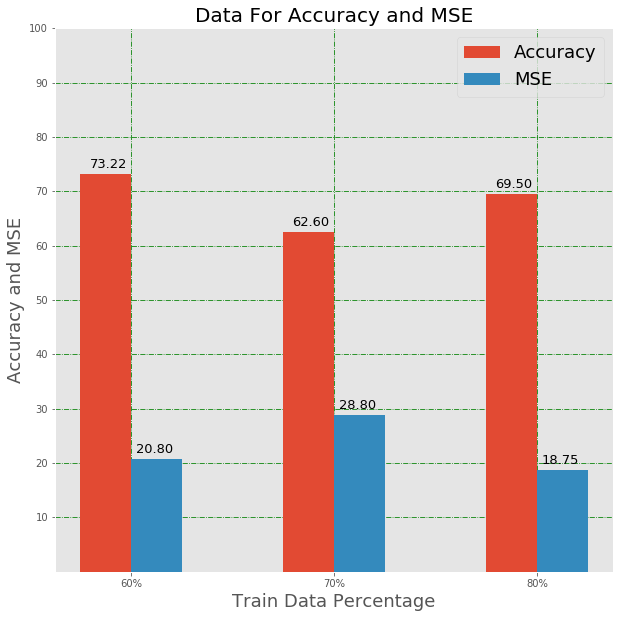

In [6]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
list_bar_name=['60%','70%','80%']
accuracy_bar=plt.bar(list_bar_name,list_accuracy,width=-0.25, label='Accuracy',align='edge')
mse_bar=plt.bar(list_bar_name,list_mse,width=0.25,label='MSE',align='edge')
plt.legend(fontsize=18)
plt.xlabel('Train Data Percentage',size=18)
plt.ylabel('Accuracy and MSE',size=18)
plt.yticks(range(10,110,10))
plt.title('Data For Accuracy and MSE',size=20)
plt.grid(True,linestyle='-.',color='g')

for i,text in enumerate (list_accuracy):
    plt.annotate('{0:0.2f}'.format(text),
                xy=(accuracy_bar[i].get_x(),accuracy_bar[i].get_height()),
                xytext=(-23,3),
                textcoords="offset points",
                ha='center',
                va='bottom',size=13)
for i,text in enumerate (list_mse):    
    plt.annotate('{0:0.2f}'.format(text),
                xy=(mse_bar[i].get_x(),mse_bar[i].get_height()),
                xytext=(23,3),
                textcoords="offset points",
                ha='center',
                va='bottom',size=13)

plt.show()